In [86]:
!pip install mlxtend

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
import pandas as pd 
df = pd.read_csv('drive/My Drive/Customer Preference Survey - Weekday (Responses) - Form Responses 1.csv')

In [89]:
df.head(5)

,Timestamp,เสื้อกันฝน,เต็นท์,เครื่อง Playstation,รองเท้า Vans,หูฟัง Bluetooth,โรบอทดูดฝุ่น,แผ่นไวนิล,E-Book,ยาดม,ลำโพงฟังเพลง,เครื่องฟอกอากาศในรถ,Pesto Sauce,มาสคาร่า,Milo Cereal Bar,น้ำวิตามิน,น้ำอัดลม
0,10/20/2020 10:10:07,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
1,10/20/2020 10:10:09,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ
2,10/20/2020 10:10:28,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไ่ม่เคยซื้อ
3,10/20/2020 10:10:31,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,10/20/2020 10:10:35,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ


In [90]:
missing = df.isnull().sum()
print(missing)

Timestamp              0
เสื้อกันฝน             0
เต็นท์                 0
เครื่อง Playstation    0
รองเท้า Vans           0
หูฟัง Bluetooth        0
โรบอทดูดฝุ่น           0
แผ่นไวนิล              0
E-Book                 0
ยาดม                   0
ลำโพงฟังเพลง           0
เครื่องฟอกอากาศในรถ    0
Pesto Sauce            0
มาสคาร่า               0
Milo Cereal Bar        0
น้ำวิตามิน             0
น้ำอัดลม               0
dtype: int64


In [91]:
df.drop(columns='Timestamp', inplace=True )

In [92]:
df.dropna(inplace=True)

In [93]:
df.replace(["เคยซื้อ", "เคย"], 1.0, inplace=True)

In [94]:
df.replace(["ไม่เคยซื้อ", "ไม่เคย", "ไม่เคย:", "ื้ไม่เคยซื้อ","ไ่ม่เคยซื้อ"], 0.0, inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   เสื้อกันฝน           21 non-null     float64
 1   เต็นท์               21 non-null     float64
 2   เครื่อง Playstation  21 non-null     float64
 3   รองเท้า Vans         21 non-null     float64
 4   หูฟัง Bluetooth      21 non-null     float64
 5   โรบอทดูดฝุ่น         21 non-null     float64
 6   แผ่นไวนิล            21 non-null     float64
 7   E-Book               21 non-null     float64
 8   ยาดม                 21 non-null     float64
 9   ลำโพงฟังเพลง         21 non-null     float64
 10  เครื่องฟอกอากาศในรถ  21 non-null     float64
 11  Pesto Sauce          21 non-null     float64
 12  มาสคาร่า             21 non-null     float64
 13  Milo Cereal Bar      21 non-null     float64
 14  น้ำวิตามิน           21 non-null     float64
 15  น้ำอัดลม             21 non-null     float

In [96]:
df.head(5)

,เสื้อกันฝน,เต็นท์,เครื่อง Playstation,รองเท้า Vans,หูฟัง Bluetooth,โรบอทดูดฝุ่น,แผ่นไวนิล,E-Book,ยาดม,ลำโพงฟังเพลง,เครื่องฟอกอากาศในรถ,Pesto Sauce,มาสคาร่า,Milo Cereal Bar,น้ำวิตามิน,น้ำอัดลม
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [97]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf

replace THSarabunChula-Regular.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [98]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula', size=18)

In [99]:
import numpy as np
import matplotlib.pyplot as plt

In [100]:
df.sum().sort_values(ascending=False).head(10)

น้ำอัดลม               20.0
ลำโพงฟังเพลง           18.0
เสื้อกันฝน             18.0
ยาดม                   16.0
หูฟัง Bluetooth        15.0
น้ำวิตามิน             14.0
E-Book                 14.0
Milo Cereal Bar        11.0
เครื่อง Playstation     9.0
มาสคาร่า                8.0
dtype: float64

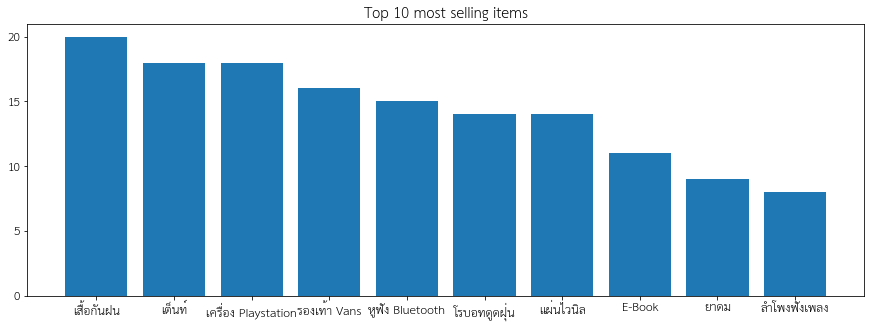

In [101]:
df_for_top10_Items = df.sum().sort_values(ascending=False).head(10)
Item= np.arange(len(df_for_top10_Items))

plt.figure(figsize=(15,5))
Items_name = ['เสื้อกันฝน',	'เต็นท์'	,'เครื่อง Playstation',	'รองเท้า Vans',	'หูฟัง Bluetooth',	'โรบอทดูดฝุ่น',	'แผ่นไวนิล',	'E-Book',	'ยาดม',	'ลำโพงฟังเพลง'	,'เครื่องฟอกอากาศในรถ',	'Pesto Sauce',	'มาสคาร่า'	,'Milo Cereal Bar',	'น้ำวิตามิน',	'น้ำอัดลม']
plt.bar(Item, df_for_top10_Items.iloc[:])
plt.xticks(Item, Items_name)
plt.title('Top 10 most selling items')
plt.show()

In [102]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [103]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

In [104]:
frequent_itemsets

,support,itemsets
0,0.857143,(เสื้อกันฝน)
1,0.714286,(หูฟัง Bluetooth)
2,0.666667,(E-Book)
3,0.761905,(ยาดม)
4,0.857143,(ลำโพงฟังเพลง)
5,0.523810,(Milo Cereal Bar)
6,0.666667,(น้ำวิตามิน)
7,0.952381,(น้ำอัดลม)
8,0.571429,"(หูฟัง Bluetooth, เสื้อกันฝน)"
9,0.666667,"(E-Book, เสื้อกันฝน)"


In [105]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(E-Book),(เสื้อกันฝน),0.666667,0.857143,0.666667,1.000000,1.166667,0.095238,inf
1,(เสื้อกันฝน),(E-Book),0.857143,0.666667,0.666667,0.777778,1.166667,0.095238,1.500000
2,(เสื้อกันฝน),(ยาดม),0.857143,0.761905,0.714286,0.833333,1.093750,0.061224,1.428571
3,(ยาดม),(เสื้อกันฝน),0.761905,0.857143,0.714286,0.937500,1.093750,0.061224,2.285714
4,(น้ำวิตามิน),(เสื้อกันฝน),0.666667,0.857143,0.619048,0.928571,1.083333,0.047619,2.000000
5,(เสื้อกันฝน),(น้ำวิตามิน),0.857143,0.666667,0.619048,0.722222,1.083333,0.047619,1.200000
6,(หูฟัง Bluetooth),(ยาดม),0.714286,0.761905,0.571429,0.800000,1.050000,0.027211,1.190476
7,(ยาดม),(หูฟัง Bluetooth),0.761905,0.714286,0.571429,0.750000,1.050000,0.027211,1.142857
8,(หูฟัง Bluetooth),(ลำโพงฟังเพลง),0.714286,0.857143,0.666667,0.933333,1.088889,0.054422,2.142857
9,(ลำโพงฟังเพลง),(หูฟัง Bluetooth),0.857143,0.714286,0.666667,0.777778,1.088889,0.054422,1.285714


In [106]:
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(E-Book),(เสื้อกันฝน),0.666667,0.857143,0.666667,1.000000,1.166667,0.095238,inf
1,(เสื้อกันฝน),(E-Book),0.857143,0.666667,0.666667,0.777778,1.166667,0.095238,1.500000
2,(เสื้อกันฝน),(ยาดม),0.857143,0.761905,0.714286,0.833333,1.093750,0.061224,1.428571
3,(ยาดม),(เสื้อกันฝน),0.761905,0.857143,0.714286,0.937500,1.093750,0.061224,2.285714
4,(น้ำวิตามิน),(เสื้อกันฝน),0.666667,0.857143,0.619048,0.928571,1.083333,0.047619,2.000000
...,...,...,...,...,...,...,...,...,...
187,"(ลำโพงฟังเพลง, ยาดม)","(น้ำวิตามิน, น้ำอัดลม)",0.714286,0.666667,0.523810,0.733333,1.100000,0.047619,1.250000
188,(น้ำวิตามิน),"(น้ำอัดลม, ลำโพงฟังเพลง, ยาดม)",0.666667,0.666667,0.523810,0.785714,1.178571,0.079365,1.555556
189,(น้ำอัดลม),"(น้ำวิตามิน, ลำโพงฟังเพลง, ยาดม)",0.952381,0.523810,0.523810,0.550000,1.050000,0.024943,1.058201
190,(ลำโพงฟังเพลง),"(น้ำวิตามิน, น้ำอัดลม, ยาดม)",0.857143,0.523810,0.523810,0.611111,1.166667,0.074830,1.224490


In [107]:
import networkx as nx

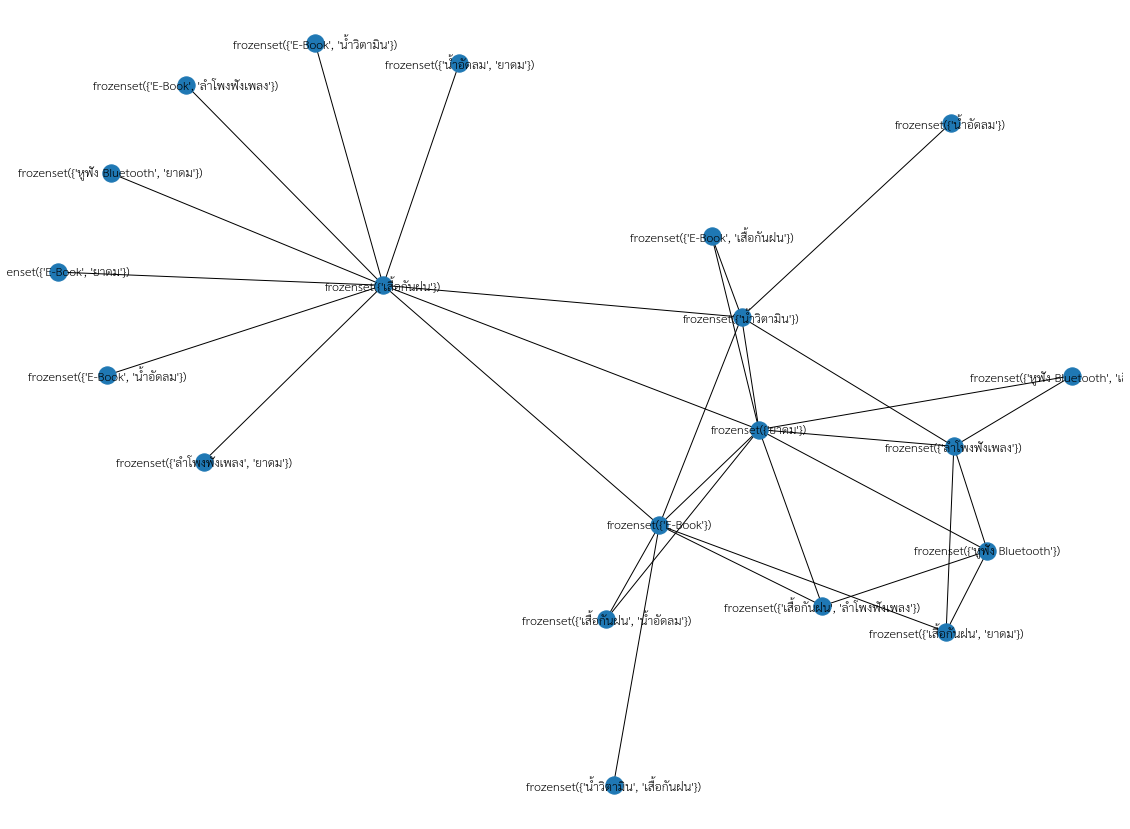

In [108]:
fig, ax = plt.subplots(figsize=(20,15))
GA = nx.from_pandas_edgelist(rules[:60], source='antecedents',target='consequents')
nx.draw(GA, with_labels=True, font_family='TH Sarabun Chula', font_size=18)
plt.show()

In [109]:
item_item_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

In [110]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(df.iloc[:,i],df.iloc[:,j])

In [111]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item', 'value']

In [112]:
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]

In [113]:
links_filtered.sort_values(by=['value'], ascending=False).head(20)

,item,related item,value
240,น้ำอัดลม,เสื้อกันฝน,0.895979
249,น้ำอัดลม,ลำโพงฟังเพลง,0.895979
159,ลำโพงฟังเพลง,น้ำอัดลม,0.895979
15,เสื้อกันฝน,น้ำอัดลม,0.895979
137,ยาดม,ลำโพงฟังเพลง,0.883883
152,ลำโพงฟังเพลง,ยาดม,0.883883
128,ยาดม,เสื้อกันฝน,0.883883
8,เสื้อกันฝน,ยาดม,0.883883
112,E-Book,เสื้อกันฝน,0.881917
7,เสื้อกันฝน,E-Book,0.881917


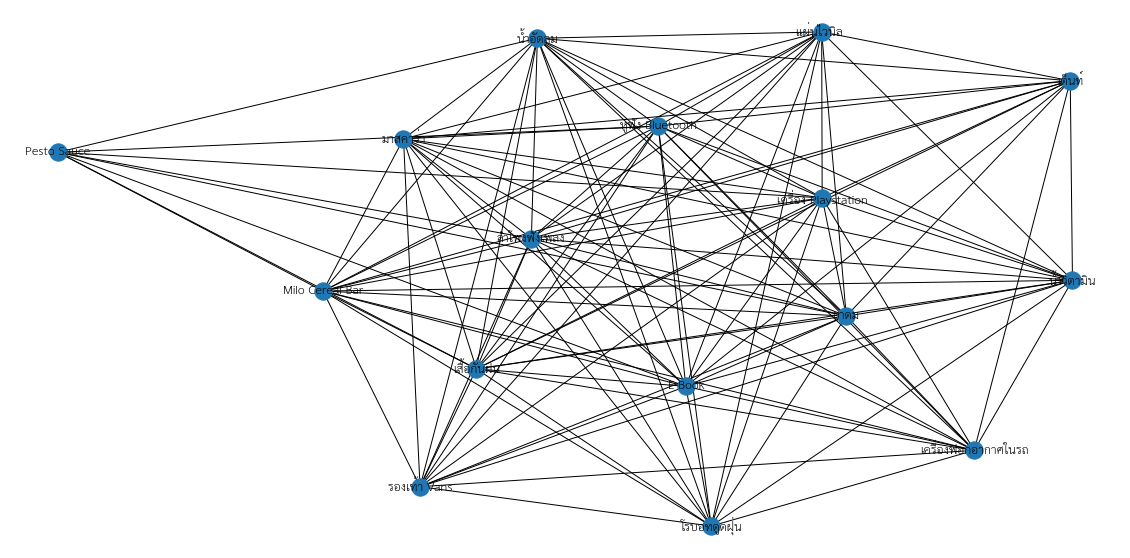

In [114]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(20,10))
GA = nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA, with_labels=True, font_family='TH Sarabun Chula', font_size=18)
plt.show()